# Predict Tshirt size with KNN

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [4]:
tshirt = pd.read_csv('../datasets/tshirt/Tshirt_Sizing_Dataset.csv')

In [5]:
tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [6]:
tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


### Data Clean / Preprocess

In [8]:
X = tshirt.iloc[:, 0:2].values

In [10]:
X.shape

(18, 2)

In [13]:
y = tshirt.iloc[:,2].values

In [14]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [17]:
# transform y data into digits (0,1)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# Create train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 5)



### Model Training

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Model testing

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred

array([1, 1, 0, 1, 0])

In [39]:
y_test

array([1, 1, 0, 1, 0])

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

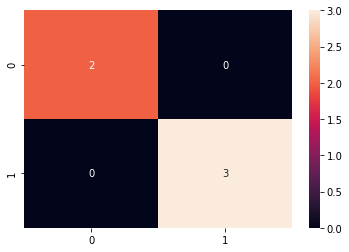

In [41]:
sns.heatmap(cm,annot = True)